In [1]:
#Aline Barboza Soares RA:1800136  E-mail: aline.soares@aluno.faculdadeimpacta.com.br
#Luciana silveira     RA:1800005  E-mail: luciana.silveira@aluno.faculdadeimpacta.com.br

In [2]:
#1. (1,0) Leia a base de dados de nome cidade_br.csv e exiba os dados brutos no Jupyter Notebook.

In [15]:
import pandas

In [16]:
dados = pandas.read_csv('C:/Faculdade/AC03/cidades_br.csv')

In [17]:
print(dados)

      Código IBGE    Nome do Município  Código UF  UF              Estado  \
0         5200050      Abadia de Goiás         52  GO               Goiás   
1         3100104  Abadia dos Dourados         31  MG        Minas Gerais   
2         5200100            Abadiânia         52  GO               Goiás   
3         3100203               Abaeté         31  MG        Minas Gerais   
4         1500107           Abaetetuba         15  PA                Pará   
...           ...                  ...        ...  ..                 ...   
5565      4314548       Pinto Bandeira         43  RS   Rio Grande do Sul   
5566      4220000     Balneário Rincão         42  SC      Santa Catarina   
5567      4212650       Pescaria Brava         42  SC      Santa Catarina   
5568      1504752     Mojuí dos Campos         15  PA                Pará   
5569      5006275    Paraíso das Águas         50  MS  Mato Grosso do Sul   

      Latitude  Longitude  
0    -16.75730   -49.4412  
1    -18.48310   -4

In [18]:
#2. (1,0) Atribua x para Latitude e y para Longitude e visualize as coordenadas das cidades no gráfico tipo scatter 

In [19]:
from pandas import DataFrame

In [20]:
import matplotlib.pyplot as plt

In [21]:
from sklearn.cluster import KMeans

In [22]:
Cidade = {'x': dados.Latitude,
        'y': dados.Longitude
       }

In [23]:
df = DataFrame(Cidade,columns=['x','y'])

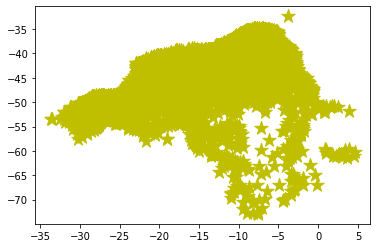

In [24]:
plt.scatter(Cidade['x'],Cidade['y'], label = 'Pontos', color = 'y', marker = '*', s = 200)

In [236]:
#3. Aplique o algoritmo K-Médias para agrupar a base:
#(1,0) Para dois clusters. Apresente os gráficos correspondentes com os pontos de cada cluster em uma cor diferente

In [25]:
kmeans = KMeans(n_clusters=2).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

[[ -7.99825117 -41.55980668]
 [-22.24075392 -49.43229123]]


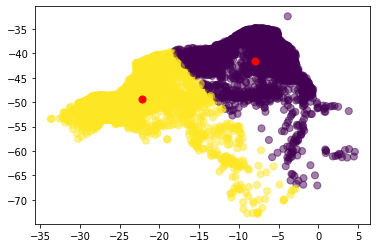

In [26]:
plt.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=50)

In [239]:
#(1,0) Para o valor de clusters n a sua escolha. 
#Apresente os gráficos correspondentes com os pontos de cada cluster em uma cor diferente

In [240]:
kmeans = KMeans(n_clusters=6).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

[[-27.37762935 -52.02497778]
 [-18.7982683  -42.95060045]
 [ -8.16482559 -37.97164885]
 [ -5.51851202 -46.1517738 ]
 [ -8.45392943 -60.91168438]
 [-20.71061447 -49.38148599]]


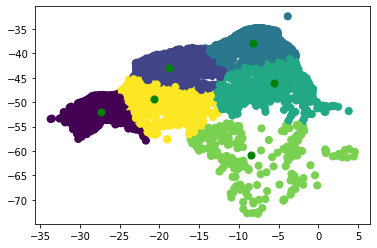

In [241]:
plt.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=1)
plt.scatter(centroids[:, 0], centroids[:, 1], c='g', s=50)

In [243]:
#4.  Aplique o algoritmo DBSCAN para agrupar a base:
#(1,0) Para os parâmetros eps=.3, min_samples=2. Apresente os gráficos correspondentes.

In [267]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

In [268]:
Brasil = dados[['Latitude','Longitude']].where(dados['UF'].isin(['RO','AC','AM','RR','PA','AP','TO','MA','PI','CE','RN','PB','PE','AL','SE','BA','MG','ES','RJ','SP','PR','SC','RS','MS','MT','GO','DF'
])).dropna()
x = Brasil.values

In [269]:
print(Brasil)
kmeans = KMeans(n_clusters=2)
kmeans.fit(x)

      Latitude  Longitude
0    -16.75730   -49.4412
1    -18.48310   -47.3916
2    -16.19700   -48.7057
3    -19.15510   -45.4444
4     -1.72183   -48.8788
...        ...        ...
5565 -29.09750   -51.4503
5566 -28.83140   -49.2352
5567 -28.39660   -48.8864
5568  -2.68220   -54.6425
5569 -19.02160   -53.0116

[5570 rows x 2 columns]


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [270]:
Brasil['clusters'] = kmeans.predict(x)
centros = kmeans.cluster_centers_

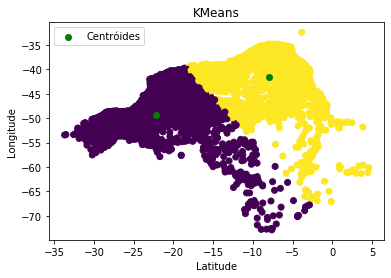

In [271]:
plt.title('KMeans')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.scatter(Brasil['Latitude'].values, Brasil['Longitude'].values, c = Brasil['clusters'])
plt.scatter(centros[:,0], centros[:,1], c = 'g', label='Centróides')
plt.legend()
plt.show()

In [272]:
dbscan = DBSCAN(eps=0.3,min_samples=2)
z = dbscan.fit_predict(x)

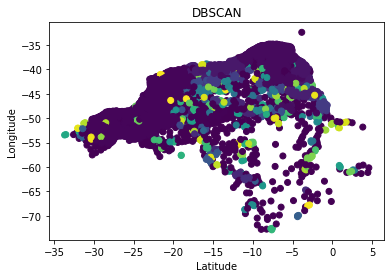

In [273]:
plt.title('DBSCAN')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.scatter(Brasil['Latitude'].values, Brasil['Longitude'].values, c = z)
plt.show()

In [274]:
#5.(2,0) Aplique os algoritmos K-Médias e DBSCAN para agrupar as cidades da região Sudeste. 
#Ajuste os parâmetros para obtermos 5 clusters com ambos os algoritmos. 
#Apresente os gráficos correspondentes.

In [275]:
Sudeste = dados[['Latitude','Longitude']].where(dados['UF'].isin(['SP','sp','MG','mg','ES','es','RJ','rj'])).dropna()
x = Sudeste.values

In [276]:
print(Sudeste)
kmeans = KMeans(n_clusters=5)
kmeans.fit(x)

       Latitude  Longitude
1    -18.483100 -47.391600
3    -19.155100 -45.444400
12   -20.299600 -42.474300
15   -20.359000 -43.143900
28   -19.067100 -42.541900
...         ...        ...
5541 -23.443890 -46.917778
5542 -23.221994 -45.310883
5543 -23.541056 -46.370972
5544 -21.549999 -47.780083
5545 -22.868000 -50.681374

[1668 rows x 2 columns]


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [277]:
Sudeste['clusters'] = kmeans.predict(x)
centros = kmeans.cluster_centers_

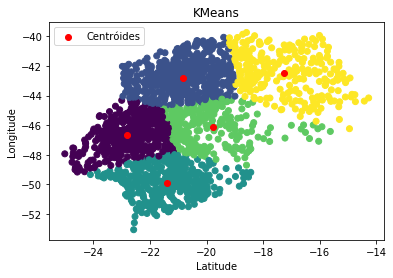

In [278]:
plt.title('KMeans')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.scatter(Sudeste['Latitude'].values, Sudeste['Longitude'].values, c = Sudeste['clusters'])
plt.scatter(centros[:,0], centros[:,1], c = 'r', label='Centróides')
plt.legend()
plt.show()

In [279]:
dbscan = DBSCAN(eps=0.5,min_samples=5)
z = dbscan.fit_predict(x)

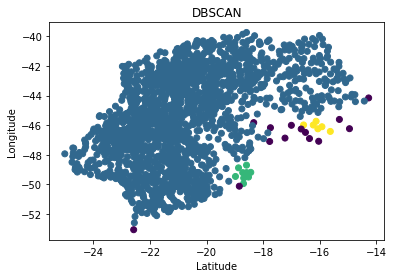

In [280]:
plt.title('DBSCAN')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.scatter(Sudeste['Latitude'].values, Sudeste['Longitude'].values, c = z)
plt.show()

In [281]:
#6.(2,0) Aplique os algoritmos K-Médias e DBSCAN para agrupar as cidades do estado do Amazonas. 
#Ajuste os parâmetros para obtermos 5 clusters com ambos os algoritmos. Apresente os gráficos correspondentes.

In [282]:
Amazonas = dados[['Latitude','Longitude']].where(dados['UF'].isin(['AM','am'])).dropna()
x = Amazonas.values

In [283]:
print(Amazonas)

      Latitude  Longitude
167  -3.227270 -64.800700
192  -3.374550 -68.200500
213  -3.566970 -61.396300
249  -3.746030 -61.657500
283  -7.194090 -59.896000
...        ...        ...
5249 -2.996090 -65.113300
5304 -2.529360 -57.753800
5308 -3.128410 -58.149600
5473 -3.314000 -59.555737
5474 -6.438519 -68.243736

[62 rows x 2 columns]


In [284]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [285]:
Amazonas['clusters'] = kmeans.predict(x)
centros = kmeans.cluster_centers_

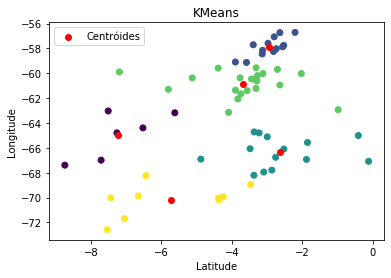

In [263]:
plt.title('KMeans')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.scatter(Amazonas['Latitude'].values, Amazonas['Longitude'].values, c = Amazonas['clusters'])
plt.scatter(centros[:,0], centros[:,1], c = 'r', label='Centróides')
plt.legend()
plt.show()

In [264]:
dbscan = DBSCAN(eps=1,min_samples=4)
z = dbscan.fit_predict(x)

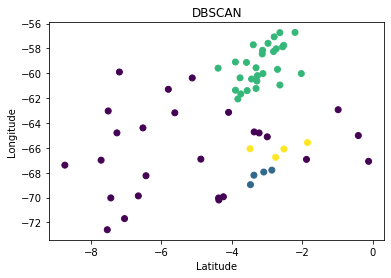

In [163]:
plt.title('DBSCAN')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.scatter(Amazonas['Latitude'].values, Amazonas['Longitude'].values, c = z)
plt.show()